<div dir='rtl'>
<h1>تخمین توزیع بتا</h1>
</div>

<div dir='rtl'>
در مطالب تدریسی مشاهده کردید که توزیع بتا یک توزیع منعطف، با توانایی اعمال محدوده سخت برای مقادیر متغیر تصادفی خود است. از این رو، این توزیع یک کاندید مناسب برای مدل کردن توزیع متغیر‌های تصادفی‌ای است که مقادیر آن‌ها محدود به یک بازه خاص است. برای برازش این توزیع بر روی مشاهدات، می‌توان از تخمین بیزی برای تخمین پارامتر‌های توزیع استفاده کرد. در این تمرین از بازپیاده سازی محاسبات خودداری کرده و از قابلیت‌های زبان R استفاده خواهیم کرد.
</div>

<div dir='rtl'>
در کد زیر نمرات درس برنامه‌سازی پیشرفته به شما داده شده است. حال می‌خواهیم توزیعی برای مقدار دقیق نمرات داشته باشیم. به نظر شما باید چه کنیم؟ می‌دانیم محدوده نمرات محدود است (در دادگان ما این نمرات به بازه صفر تا بیست نگاشت شده‌اند). بنابراین برازش توزیع بتا بر روی آن‌ها می‌تواند نتایج مطلوبی به دنبال داشته باشد. در این تمرین این مسئله را بررسی می‌کنیم.
</div>

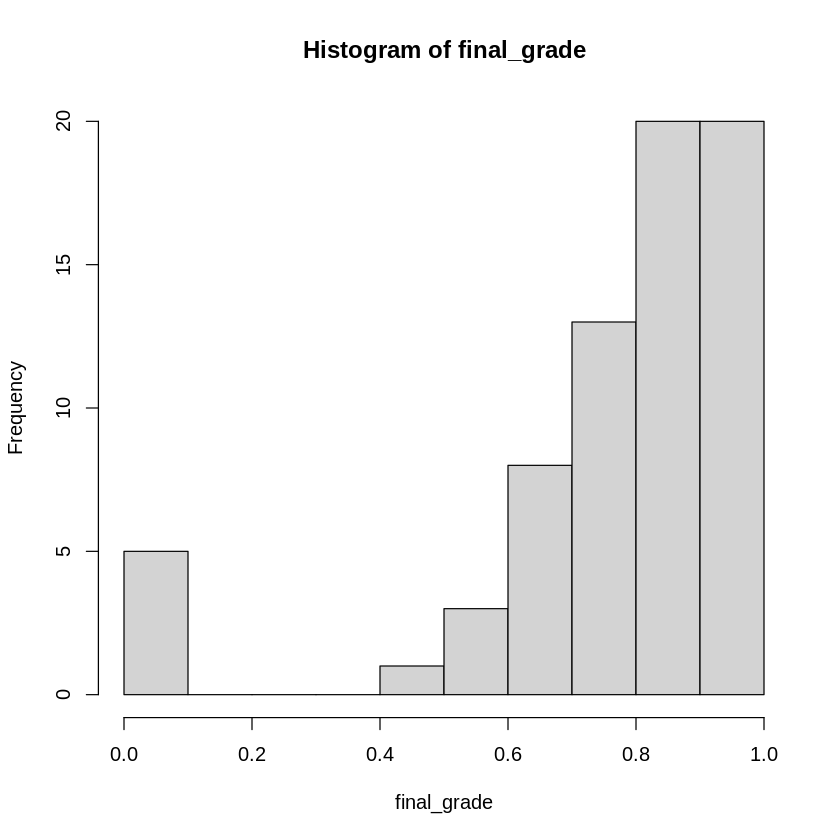

In [1]:
final_grade <- c(
       19.3, 18.2, 14.1, 15.1, 17.1, 0.0,
       16.2, 17.4, 16.1, 19.2, 14.6, 13.4,
       18.0, 15.7, 14.8, 17.0, 19.6, 18.2,
       0.0, 17.2, 0.0, 18.8, 16.7, 11.0,
       17.5, 19.3, 17.2, 13.5, 0.0, 18.5,
       16.8, 16.4, 12.8, 17.9, 19.4, 12.9,
       12.4, 19.1, 12.3, 18.0, 18.4, 18.5,
       15.2, 0.0, 12.9, 14.1, 17.5, 17.2,
       15.6, 14.9, 16.9, 12.0, 15.9, 18.4,
       17.8, 19.3, 12.0, 15.6, 13.7, 10.0,
       17.6, 19.1, 19.9, 18.2, 18.3, 17.7,
       19.0, 15.5, 15.1, 18.4
)

# Normalize final_grade to be in [0,1].
final_grade <- final_grade/20

hist(final_grade)

<div dir='rtl'>
مشاهده می‌کنیم که مقادیر صفر نمودار را از حالت طبیعی خارج کرده‌اند. دلیل این امر آن است که نمره غایبین امتحان واقعا از توزیع نمرات امتحان پیروی نمی‌کند. بنابراین خوب است اگر این مقادیر را از دادگان حذف کنیم.
</div>

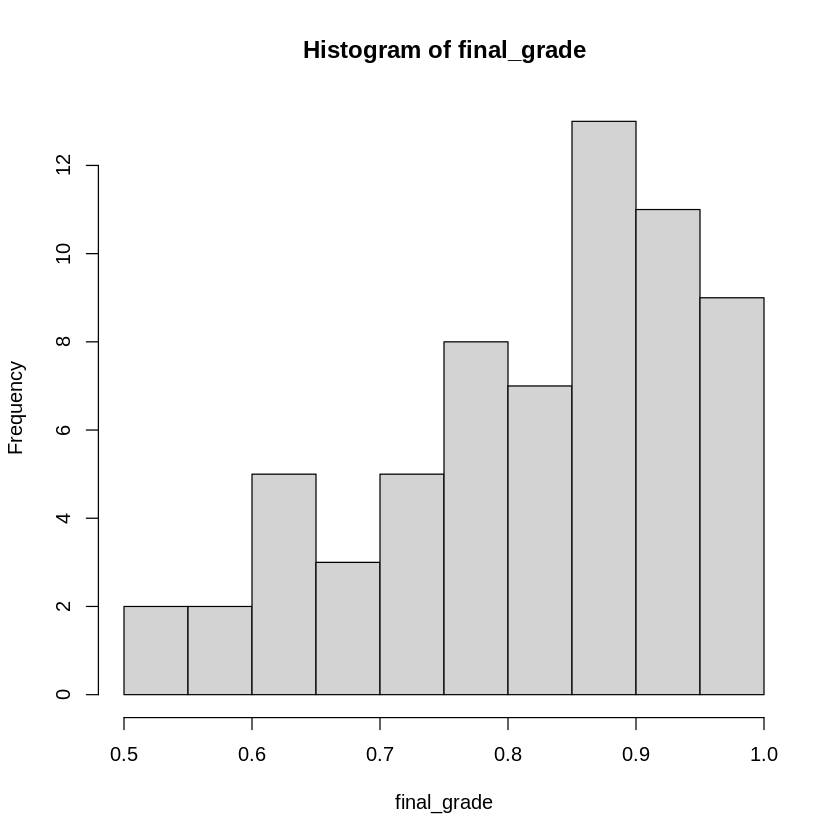

In [2]:
# Remove zero values from final_grade.
final_grade <- final_grade[final_grade != 0]
###############################################################
# Code here based on the given instructions.                  #
# Overwrite final_grade with its non-zero values.             #
# Dont use loops                                              #
###############################################################

hist(final_grade)

In [3]:
install.packages("EnvStats")
library(EnvStats)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘nortest’



Attaching package: ‘EnvStats’


The following objects are masked from ‘package:stats’:

    predict, predict.lm


The following object is masked from ‘package:base’:

    print.default




In [4]:
# Estimate beta distribution parameters using `ebeta()` function which
# is defined in the EnvStats library.
beta_dist_estimation <- ebeta(final_grade)

a <- beta_dist_estimation$parameters["shape1"]
b <- beta_dist_estimation$parameters["shape2"]

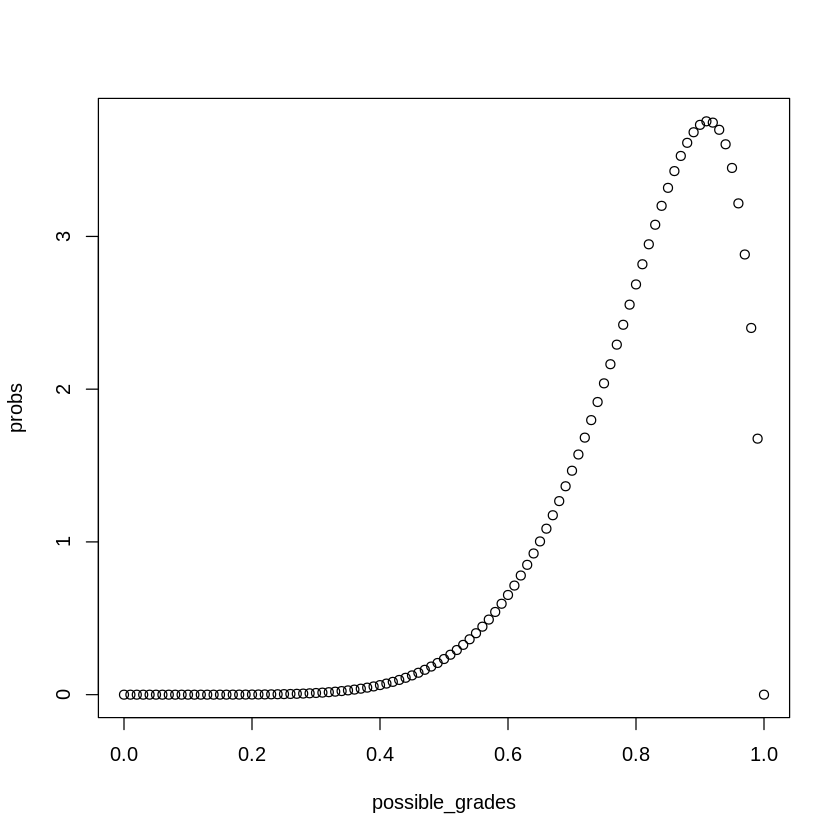

In [5]:
# Computing distribution density given the estimated parameters using `dbeta()`.
possible_grades <- seq(0, 1, by = 0.01)

###############################################################
probs = dbeta(possible_grades,a,b,log=FALSE)
# Code here based on the given instructions.                  #
# Using `dbeta()`, compute a variable named `probs` as the    #
# density of the estimated beta distribution over the         #
# `possible_grades`. Google it to find the proper parameter   #
# setting:                                                    #
# probs = dbeta( ... )                                        #
###############################################################

plot(possible_grades, probs)

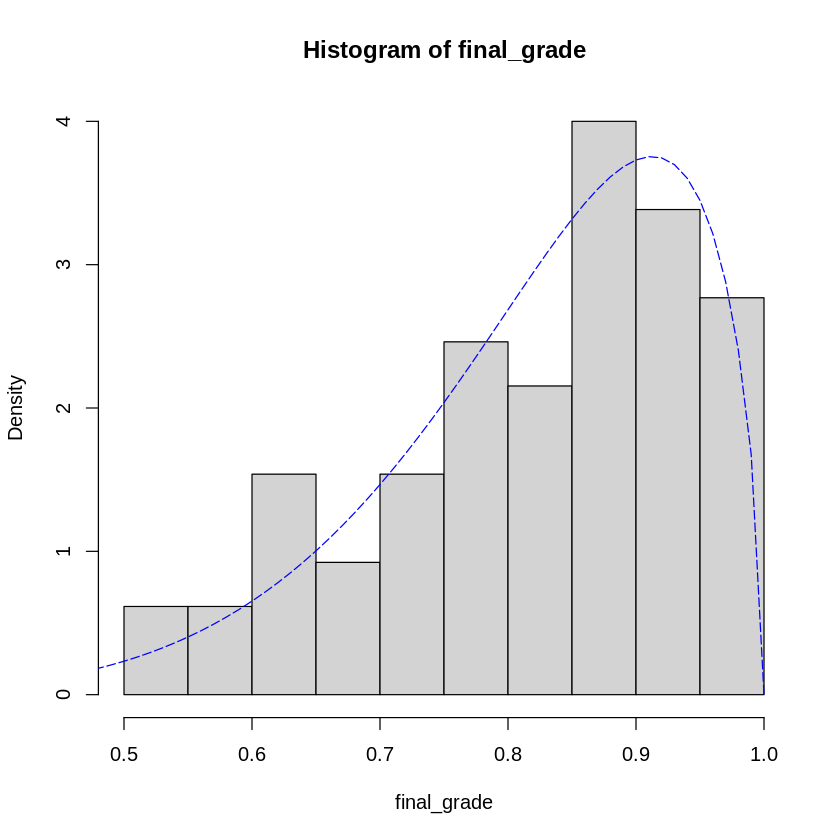

In [6]:
# Plot

hist(final_grade, freq = FALSE)
lines(possible_grades, probs, col = 'blue', lty=5)
legend(0.05, 1.75, legend=c("Observed", "Estimated Beta Distribution"),
       col=c("gray", "blue"), lty=c(1,5), cex=.8)

<div dir='rtl'>
<h1>کواریانس و همبستگی</h1>
</div>

<div dir='rtl'>
همانطور که می‌دانید، کواریانس در واقع معیاری برای تغییرات یک متغیر نسبت به تغییرات یک متغیر دیگر است. به عبارتی، کواریانس نشان‌دهنده این است که دو متغیر تصادفی چگونه باهم تغییر می‌کنند.

محاسبه کواریانس برای دو متغیر تصادفی از یک جمعیت مشخص را در درس آموخته‌اید، اما برای محاسبه کواریانس روی نمونه‌ها، کواریانس به صورت زیر محاسبه می‌شود
($n$ برابر با اندازه نمونه است):
</div>

$$cov(x, y) = \frac{Σ_{i=1}^n (x_i - x̄)(y_i - \bar y)}{n-1}$$

In [7]:
# The below function calculates covariance of x and y using above equation.
covariance <- function(x, y) {
  return (
    ###############################################################
    sum((x-mean(x)) * (y-mean(y)))/(length(x)-1)
    # Code Here                                                   #
    # This function should return covariance of x and y.          #
    # Use 'mean()' and 'sum()'.                                   #
    ###############################################################
  )
}

In [8]:
# Check
x <- c(25, 27, 29)
y <- c(5, 15, 9)

covariance(x, y)

[1] 4

In [9]:
# Above result should be same as below
cov(x, y)

[1] 4

<div dir='rtl'>
 برای محاسبه همبستگی روی نمونه‌ها، کواریانس به صورت زیر محاسبه می‌شود:
 ($s_x, s_y$ به  ترتیب نشان‌دهنده انحراف معیار نمونه متغیرهای تصادفی
 $x, y$ هستند)
</div>

$$r_{xy}=\frac{cov(x, y)}{s_xs_y}$$

In [10]:
# The below function calculates correlation of x and y using above equation.
correlation <- function(x, y) {
  return (
    covariance(x,y)/(sd(x)/sd(y))
    ###############################################################
    # Code Here                                                   #
    # This function should return correlation of x and y.         #
    # Use 'covarinace()' and 'sd()'.                              #
    ###############################################################
  )
}

In [11]:
# Check
x <- c(25, 27, 29)
y <- c(5, 15, 9)

correlation(x, y)

[1] 10.06645

In [12]:
# Above result should be same as below
cor(x, y)

[1] 0.3973597